# Introduction

Considering the elder health issue, fall is a serious public health problem and possibly life-threatening for people in fall risk groups. It is one of the most important turning points which not only the manifestation of diseases but also triggers other diseases. Thus, detecting falling and tracking movement helps researchers better understand the information before elder falls. Thereby, researchers can build a warning system to warn people around or send message to relatives in time.
Özdemir et al develop an automated fall detection system with wearable motion sensor units fitted to the subjects' body at six different positions. Each unit comprises three triaxial devices (accelerometer, gyroscope, and magnetometer/compass) Fourteen volunteers perform a standardized set of movements including 20 voluntary falls and 16 activates of daily living, resulting in a large dataset with 2520 trials. To reduce the computational complexity of training and testing the classifiers, Özdemir et al decided to focus on the raw data for each sensor in a 4 s time window around the point of peak total acceleration of the waist sensor, and then perform feature extraction and reduction.(Özdemir et al, 2017)

Reference: Özdemir, Ahmet Turan, and Billur Barshan. “Detecting Falls with Wearable Sensors Using Machine Learning Techniques.” Sensors (Basel, Switzerland) 14.6 (2014): 10691–10708. PMC. Web. 23 Apr. 2017.

# Dataset

The fall detection dataset of Chinese hospitals of old age patients comes from the Kaggle Competition "Fall Detection Data from China" (https://www.kaggle.com/pitasr/falldata). The data consists of over 10000 sample of activities with six attributes. The attributes includes time, sugar level (SL), EEG monitoring rate (EEG), blood pressure (BP), heart beat rate (HR), blood circulation (CIRCULATION).

# Project Definition

For old people, this project will predict if that elder will fall or not in the situation based on time, sugar level, eeg noitorying rate, blood pressure, heart rate and blood circulation. 

# Data Exploration

1) load dataset into a dataframe (df)

2) define an OUTPUT_LABEL

3) calculate the prevalence of the positive class

In [1]:
#Load dataset into a dataframe named df
import pandas as pd
df = pd.read_csv('falldeteciton.csv')

In [2]:
#number of observation
print('Number of samples:',len(df))
#Sample Dataset
print(df.head())

Number of samples: 16382
   ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809


In [3]:
#size of each ACTIVITY
df.groupby("ACTIVITY").size()

ACTIVITY
0    4608
1     502
2    2502
3    3588
4    3494
5    1688
dtype: int64

In the Activity column, 0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running.

Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [4]:
df['OUTPUT_LABEL'] = (df.ACTIVITY == 3).astype('int')

Since 3 indicates falling, in this project, we take 3 for positive class and other activities as negative classes.

In [5]:
df[['ACTIVITY','OUTPUT_LABEL']].head()

,ACTIVITY,OUTPUT_LABEL
0,3,1
1,2,0
2,2,0
3,4,0
4,4,0


Calculate the prevalence of the positive class

In [6]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [7]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.219


In all the observation, the precentage of elder people fall is 21.9%.

Briefly explore the columns and unique values of the dataset. 

In [8]:
#explore the columns
#Dataset
df[list(df.columns)].head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,OUTPUT_LABEL
0,3,4722.92,4019.64,-1600.00,13,79,317,1
1,2,4059.12,2191.03,-1146.08,20,54,165,0
2,2,4773.56,2787.99,-1263.38,46,67,224,0
3,4,8271.27,9545.98,-2848.93,26,138,554,0
4,4,7102.16,14148.80,-2381.15,85,120,809,0


In [9]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

ACTIVITY
[3 2 4 5 0 1]
TIME: 16009 unique values
SL: 16137 unique values
EEG: 11225 unique values
BP: 341 unique values
HR: 652 unique values
CIRCLUATION: 2234 unique values
OUTPUT_LABEL
[1 0]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(2,3,1)
df[["ACTIVITY"]].boxplot()
plt.subplot(2,3,2)
df[["TIME"]].boxplot()
plt.subplot(2,3,3)
df[["SL"]].boxplot()
plt.subplot(2,3,4)
df[["EEG"]].boxplot()
plt.subplot(2,3,5)
df[["BP"]].boxplot()
plt.subplot(2,3,6)
df[["HR"]].boxplot()
plt.tight_layout()


In the "Fall detection dataset from China", there are 7 coloumns: ACTIVITIES, TIME, SL, EEG, BP, HR, CIRCULATION. Each feature has high variance and many outliers.
    - ACTIVITIES is an output label. 
    - TIME, SL, EEG, BP, HR, CIRCLUATION are numerical variables.

# Feature Engineering

Feature engineering is a process of creating a new data frame according to the knowledge of the dataset that makes machine learning algorithms (models) work.

In this project, there are only numerical datasets. Although these features are correlated with each other, but all these features will be used in the machine learning models later because they are related to the outputs. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_cor = df[["TIME","SL","EEG","BP","HR","CIRCLUATION"]]
df_cor.corr()

,TIME,SL,EEG,BP,HR,CIRCLUATION
TIME,1.000000,0.843200,-0.048278,0.442334,0.973901,0.876956
SL,0.843200,1.000000,-0.050946,0.401064,0.859408,0.978060
EEG,-0.048278,-0.050946,1.000000,-0.049892,-0.050316,-0.050408
BP,0.442334,0.401064,-0.049892,1.000000,0.469164,0.419356
HR,0.973901,0.859408,-0.050316,0.469164,1.000000,0.904160
CIRCLUATION,0.876956,0.978060,-0.050408,0.419356,0.904160,1.000000


SL has strong positive correlation with TIME

HR has strong positive correlation with TIME

CIRCLUATION has strong positive correlation with TIME

HR has strong positive correlation with SL

CIRCLUATION has strong positive correlation with SL

CIRCLUATION has strong positive correlation with HR

Week 2: Make a new dataframe that only has the columns of interest. Double check that the columns used to define your OUTPUT_LABEL are not part of cols_input! 


In [13]:
cols_num = ["TIME","SL","EEG","BP","HR","CIRCLUATION"]
cols_all_cat =[]
cols_extra=[]

Let's check if there are any missing values in the numerical data

In [14]:
df[cols_num].isnull().sum()

TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [15]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 6
Numerical Features: 6
Categorical Features: 0
Extra features: 0


There exist no missing values.

In [16]:
cols_input = cols_num
df_data = df[cols_input + ['OUTPUT_LABEL']]
df_data.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION,OUTPUT_LABEL
0,4722.92,4019.64,-1600.00,13,79,317,1
1,4059.12,2191.03,-1146.08,20,54,165,0
2,4773.56,2787.99,-1263.38,46,67,224,0
3,8271.27,9545.98,-2848.93,26,138,554,0
4,7102.16,14148.80,-2381.15,85,120,809,0


# Building Training/Validation/Test Samples

Training samples take 70% of the total sample and training samples are used to fit the data and test the internal validation. (train the model.) Validation samples take 15% of total sample and it is used to compare between different algorithm (improve the model) Test samples take 15% of total sample and it is predictive ability/test the external validation.

The methdology is the following. I first shuffle the samples in order to avoid any order which might affect the modeling. And then I use `random_state` as a random number generator. Finally I used `sample` function in to separate the data into training, validation and test with proportion of 70%, 15% and 15% respectively as I described above and caocluate the prevalence for each small dataset. 

Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [17]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [18]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [ ]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [ ]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [ ]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 2458):0.216
Valid prevalence(n = 2457):0.222
Train all prevalence(n = 11467):0.219


In each dataset, the prevalence remain around 0.2.This means, there are 20% positive classes and 80% negative classes. Hence, we need to balance the data in order to give more weight to the positives and less weight to nagetive weight. To do so, we use data balance method. We first split the training data into positive and negative, and then merge the balanced data and shuffle the order of training samples. Such data balance will provide advantages that the training dataset has 0.5 prevalence which same as the what we set for threshold (the threshold setting is in the next section).there are many other method to realzie balance data. For example, downsampling. A trade off using data balance is that we need be aware the disadvantage of losing information. Moreover, some model is relatively not very sensitive to imbalanced data. For example, stochastic gradient bossting is less sensitive than random forests.

In [ ]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 16382)


In [ ]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 5022):0.500


Save all 4 dataframes to csv and the cols_input

In [ ]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [ ]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Fill any missing values with the mean value 

In [ ]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [ ]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [ ]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,TIME,10940.884639
1,SL,75105.824174
2,EEG,-5013.830946
3,BP,58.191768
4,HR,211.625098


In [ ]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [ ]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (11467, 6)
Training shapes: (5022, 6) (5022,)
Validation shapes: (2457, 6) (2457,)


Create a scalar, save it, and scale the X matrices

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [ ]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [ ]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

We  train a few machine learning models and use a few techniques for optimizing them. We will then select the best model based on performance matrics on the validation set. I choose AUC as the performance metrics because it is independent from threshold and my project does not need business sense for example minimize true positive or false negative.

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [ ]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

KNN has the full name K nearest neighbors. It is used often in classification. For a given data point, according to the distance from k nearest neighbors to classify the value of the data point. There are many different distance method could be use in KNN. Also, the number of k would affect the result of using KNN. Hence, two important hyperparameters are k and distance method.

Week 2: train a KNN and evaluate performance

In [ ]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [ ]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.767
accuracy:0.693
recall:0.783
precision:0.664
specificity:0.588
prevalence:0.500
 
Validation:
AUC:0.746
accuracy:0.610
recall:0.780
precision:0.337
specificity:0.542
prevalence:0.222
 


### Logistic Regression

The logistic regression measures the relatipnship between the categorical dependent variable and one or mor independent variables by estimating probabilities using a logistic function. It is very common to conduct binary  depenent variable. 

Train a logistic regression and evaluate the performance

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/Users/Ginna/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.625
accuracy:0.583
recall:0.573
precision:0.584
specificity:0.593
prevalence:0.500
 
Validation:
AUC:0.601
accuracy:0.576
recall:0.548
precision:0.273
specificity:0.584
prevalence:0.222
 


### Stochastic Gradient Descent

Stochastic gradient descent is similar to gradient descent that both apply the iteration and the first-order differential to solve the optimization problems. However, the stochastic gradient descent only uses one piece of data in each iteration instead of using all of the data information. Therefore, the stochastic could help to reduce the calculation speed, but it may take more iterations to reach the optimum solutions for the stochastic data used in the iterations. In this algorithm, the learning rate is an important hyperparameter.

Train a stochastic gradient descent model and evaluate the performance

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/Users/Ginna/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.588
accuracy:0.543
recall:0.696
precision:0.533
specificity:0.389
prevalence:0.500
 
Validation:
AUC:0.563
accuracy:0.451
recall:0.685
precision:0.241
specificity:0.384
prevalence:0.222
 


### Naive Bayes

Naive Bayes model assumes that all the variables are independent. Thus, we could calculate the probability of the event given the other variables probabilities without trouble of multicollinearity. In this algorithm, we implement the Bayes theorem and the assumptions of the independence, therefore, we call it Naive Bayes. There are many different types of the probability distribution for the other variables like the normal distribution, Multinomial Naive Bayes or using Gaussian distribution as we used here.

Train naive bayes model and evaluate the performance

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.580
accuracy:0.525
recall:0.838
precision:0.516
specificity:0.212
prevalence:0.500
 
Validation:
AUC:0.544
accuracy:0.338
recall:0.813
precision:0.225
specificity:0.202
prevalence:0.222
 


### Decision Tree Classifier

The decision tree classifier use the concept of a tree-model. From a root question, each layer of leaves split the question into a binary question. For example, the root question, is this a male, with answer yes. The tree will go to the brunch of a male and ask next question. Each leaves represent class labels and brunches represent features with condinous condiction. Therefore, decision tree classifier at every layer select the one that gives best information gain and finalize the classifier.

Train decision tree model and evaluate the performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.931
accuracy:0.850
recall:0.922
precision:0.807
specificity:0.773
prevalence:0.500
 
Validation:
AUC:0.813
accuracy:0.718
recall:0.841
precision:0.431
specificity:0.677
prevalence:0.222
 


### Random Forest

The random forest is consist of many decision trees. Each decision tree selected subset of training set randomly. It aggregate the results from all decision trees to identity the final test classifier. One advantage of using random forest is that it is very fast to train. However, it take times to create predictions once trained. If we want to get more accurcy result, we need to have more trees and it consumes calculation time.

Train random forest model and evaluate the performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/Users/Ginna/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.847
accuracy:0.774
recall:0.871
precision:0.730
specificity:0.678
prevalence:0.500
 
Validation:
AUC:0.811
accuracy:0.683
recall:0.852
precision:0.400
specificity:0.635
prevalence:0.222
 


### Gradient Boosting Classifier

gradient boosting classifier applies gradient boostin algorithms in decision tree models. By this method, a weak decision tree model could be improved in classification through iterations and the gradients. By each iteration, the loss function will decrease until it reaches the optimum solutions. Gradient descents are used to seek the best tree model in thsi algorithm.

Train gradient boosting model and evaluate the performance

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.978
accuracy:0.925
recall:0.948
precision:0.907
specificity:0.902
prevalence:0.500
 
Validation:
AUC:0.860
accuracy:0.769
recall:0.830
precision:0.488
specificity:0.751
prevalence:0.222
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [ ]:
import pandas as pd
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [ ]:
df_results

,classifier,data_set,auc,accuracy,recall,precision,specificity
0,KNN,train,0.767213,0.693349,0.782557,0.664076,0.587814
1,KNN,valid,0.746488,0.610094,0.780220,0.337025,0.541601
2,LR,train,0.625055,0.582636,0.572680,0.584315,0.592593
3,LR,valid,0.600956,0.575906,0.547619,0.273309,0.583987
4,SGD,train,0.588163,0.542613,0.695739,0.532622,0.389486
5,SGD,valid,0.562711,0.450549,0.684982,0.240979,0.383569
6,NB,train,0.580043,0.525289,0.838311,0.515552,0.212266
7,NB,valid,0.544246,0.337810,0.813187,0.225495,0.201988
8,DT,train,0.931202,0.850259,0.921545,0.806553,0.773397
9,DT,valid,0.813360,0.717949,0.840659,0.430986,0.676609


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Pick one performance metric that will use for picking the best model. Explain the choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance. 

AUC stands as the area under reciver operating characteristic. In this binary classification prediction problem, I scaled and normalized the dataset, and AUC indicates the probability that a classifier chosen randomly is in positive ranks higher than a classifier chosen randomly is in negative. In other words, AUC represent the measurement of distinguish between classes. The number of AUC indicates how much a model is capable to distinguish labels. Also, AUC is independent from threshold and there is no such requirement that I need to improve the true positive and false nagetive. Thus, I use AUC for picking the best model. 

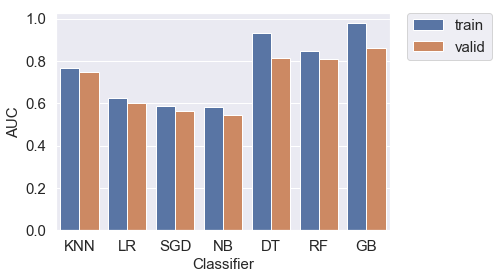

In [ ]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

## Learning Curves

Using  baseline model that has the best performance on the validation set, plot a learning curve for that model. 

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

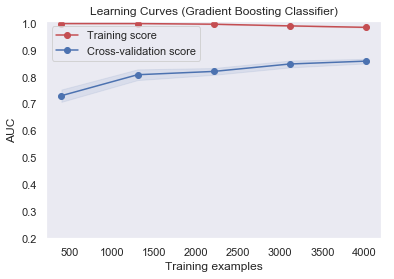

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
title = "Learning Curves (Gradient Boosting Classifier)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)
plt.show()



Identify if your model has high variance or high bias. Briefly discuss what techniques could be used to improve performance of that model.  

Because the Gradient Boosting model has the highest training AUC and it has a gap between training auc and validation auc, which indicates there is a chance to improve the model. Thus, I take GBC as the important baseline model. The learning curve of the Gradient Boosting model shows the training score is perfectly good, but there exists a large difference between the training and validation scores and is a sign of overfitting. The model has a high variance. To reduce the variance the following techniques would help reduce the variance.

● Add more samples

● Add regularization

● Reduce number of features

● Decrease model complexity

● Add better features

● Change model architecture

As it is not possible to add more samples and add better features. I will choose from reducing the number of features, decrease model complexity change model architecture. However, all my data are numerical, I believe decrease model complexity and hyperparameter tuning would boost my model.

## Feature Importance

Plot the feature importance for logistic regression and random forest models here. 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/Users/Ginna/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances

,importance
EEG,5.244815
CIRCLUATION,1.328998
TIME,1.132607
BP,-0.299546
HR,-0.605028
SL,-1.520359


Between five features, EEG has highest positive coefficients which is predictive of elder people fall and SL (Sugar level) has highest negative coefficients is predictive of elder people do not fall.



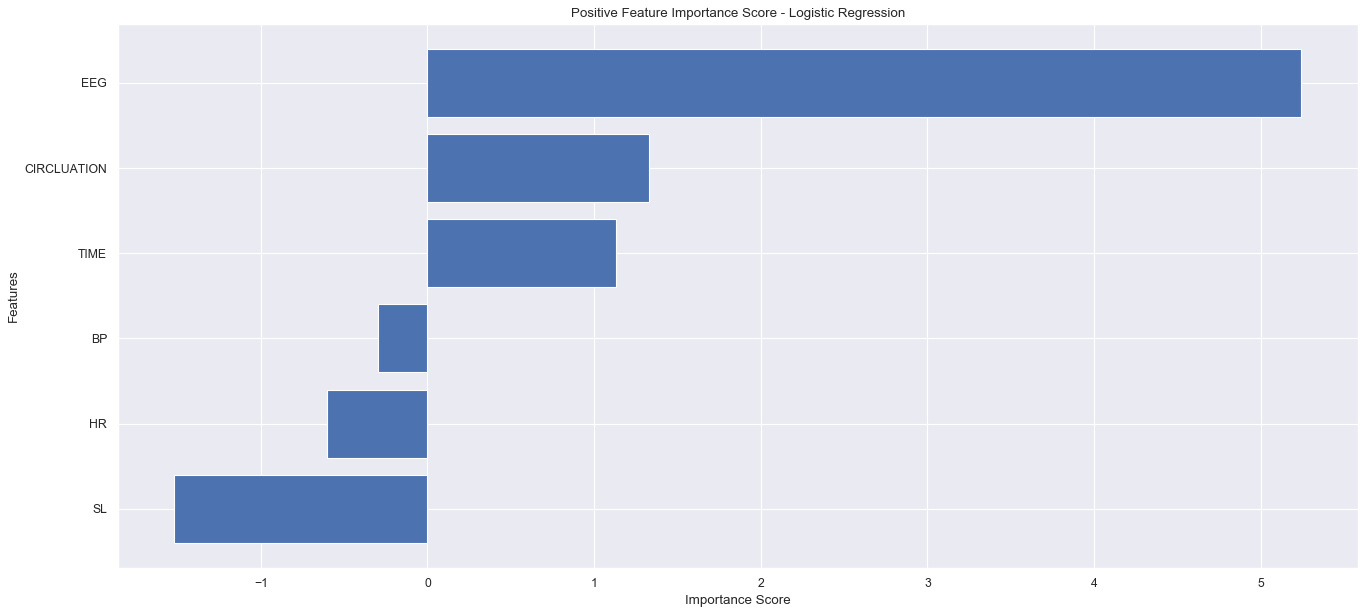

In [ ]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(20,9), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

The components providing positive influence are EEG, CIRCULATION and TIME. The component contributes the most positive influence is EEG with the value of 4.087166. The component providing negative influence are BP,HR and SL. The component contributes the most negative influence to elder people fall is SL with the value of -1.909831. Hence, EEG and SL are the top 2 impact in terms of the importance features.

## Hyperparameter tuning

Using your best baseline model, pick a hyperparameter and show its effect for a range of values (similar to what we did for the random forest and max_depths in the diabetes project. )

In setting up machine learning models, the essential is hyperparameter tuning. The hyperparameter tuning affects the performance of models. 

Because random forest moel and Gradient boosting has good performance. Here, I select a commone parameter in random forest tree model and Gradient boosting model `max_depth`. `max_depth` is the maximum depth of the tree, which means it controls the depth of the tree. I plotted the results of how the random forest and gradient boosting model perform in different `max_depth`, in other words, how `max_depth` affects the gradient boosting and random forest model.

In [ ]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=max_depth, random_state=42)
    gbc.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
    y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

In [ ]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

From the plot, as we increase the `max_depth` the training and validation performance are improved until the max_depth reach 10. After the `max_depth` reach to 10, the validation performance decreases.

In [ ]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

In [ ]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

From the plot, as we increase the `max_depth` the training and validation performance are improved. However, as the `max_depth` increase, the variance increase as well.

From the above, hyperparameter affects the random forest model significantly. However, there are many hyperparameter, and it is no efficient and unscientific to try every hyperparameter with every value. To avoid such computationally intensive, I decided use random Search (RandomizedSearchCV), which randomly test a permutation of hyperparameters. This technique can optimizes the parameters automatically.

Using RandomizedSearchCV, optimize a few of your baseline models. 
    

In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

Optimize GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

In [ ]:
gbc_random.best_params_

In [ ]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Optimize RF

In [ ]:
# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt','log2']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

In [ ]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [ ]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Make a plot comparing the performance of the optimized models to the baseline models. 

In [ ]:
df_results = pd.DataFrame({'classifier':['GB','GB','RF','RF'],
                           'data_set':['baseline','optimized']*2,
                          'auc':[gbc_valid_base_auc,gbc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc
                                 ],
                          })

In [ ]:
df_results

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [ ]:
df_results = pd.DataFrame({'classifier':['RF','RF','RF','RF','GB','GB','GB','GB'],
                           'data_set':['train baseline','valid baseline','train optimized','valid optimized']*2,
                          'auc':[
                              rf_train_base_auc,rf_valid_base_auc,rf_train_opt_auc,rf_valid_opt_auc,
                                 gbc_train_base_auc,gbc_valid_base_auc,gbc_train_opt_auc,gbc_valid_opt_auc
                         ],
                          })

In [ ]:
df_results

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

Pick your best model. Explain why I picked it. Save the model using pickle.

In [ ]:
df_results = pd.DataFrame({'classifier':['RF','RF','RF','RF'],
                           'data_set':['train baseline','valid baseline','train optimized','valid optimized']*1,
                          'auc':[
                              
                              rf_train_base_auc,rf_valid_base_auc,rf_train_opt_auc,rf_valid_opt_auc,
                                 
                         ],
                          })

In [ ]:
df_results

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

The dataset has limited features, I decided to keep all features and try to optimize the model by hyperparameter tuning. In hyperparameter tuning, random forest it has the best performance in AUC, which is 0.916817 in validation dataset. From the above, the optimized trainging dataset has a huge improvement, so do validation dataset. This means, hyperparameter tunging optimized the result. Meanwhile, the optimized training dataset is close to 1 which also indicates some kind of overfitting in the training dataset. Hence, I believe, altough the gap between optimized trainning and validation is more than the gradient boosting model, random forest cam be improved using grid search.

The hyperparameters for random forest are the following: 

{'n_estimators': 400,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 18,
 'criterion': 'entropy'}
 
 Then I save the result into pickle.

In [ ]:
pickle.dump(rf_random.best_estimator_, open('best_rf_classifier.pkl', 'wb'),protocol = 4)

Week 4: STOP HERE

# Model Evaluation

Rvaluate the performance of the best model on the training, validation and test sets. Make an ROC curve too.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_rf_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))



In [ ]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [ ]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Calculate the prediction probabilities

In [ ]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [ ]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Plot the ROC

In [ ]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Although there exist overfitting in the training dataset, the auc of test dataset matches the auc of the validation set. This model performs best in reducing overfitting and underfitting. With this model, we can use it to predict in what situation an elder people will fall and use it the aware doctors or nurse to prevent elder people from dieases. Moreover, such prediction has 81.3% accuracy. Then we are 2.4 times better than a random guess.

CONGRATS! You got to the end!